In [8]:
from scipy.io import loadmat
import mne
import os

In [9]:
data_path = os.path.abspath("../../data/eeg_denoise_net")

clean_files = []
eog_files = []
emg_files = []

for fname in os.listdir(data_path):
    if fname.endswith(".npy"):
        continue
    path = os.path.join(data_path, fname)
    mat = loadmat(path)

    if fname.startswith("EEG"):
        clean_files.append(mat)
    # elif fname.startswith("EOG"):
    #     eog_files.append(path)
    # elif fname.startswith("EMG"):
    #     emg_files.append(path)

print("=== CLEAN ===")
print(clean_files[0]["EEG_all_epochs"])
print(len(clean_files[0]["EEG_all_epochs"]))
print(len(clean_files[0]["EEG_all_epochs"][0]))

# print("=== EOG ===")
# print(eog_files)

# print("=== EMG ===")
# print(emg_files)

=== CLEAN ===
[[ 184.5070843   182.31637318   41.06444584 ...   40.16428726
   -29.60895458  -84.86153076]
 [ 171.96198926  142.91072735    8.64871514 ...   27.62597514
   -57.17578819 -116.97409977]
 [ 229.56731921  220.78558704  134.22132366 ...   -6.76600303
   -35.31005813 -141.71351487]
 ...
 [ 317.59704985  397.50090493  278.39275664 ...  117.90027968
   205.23801767  211.75347394]
 [ 262.89154388  314.56696239  214.60684865 ...   29.62677249
    73.51957718  135.4506175 ]
 [ 216.07429779  269.40535716  188.74131794 ...   49.91813242
   105.05395856   96.65882373]]
4514
512


Extracting parameters from c:\Users\Aryo\PersonalMade\Programming\GAN\repo\data\eeg_openendedloosely\raw18\april_18(2).vhdr...
Setting channel info structure...
Reading 0 ... 951014  =      0.000 ...  1902.028 secs...
<RawBrainVision | april_18(2).eeg, 63 x 951015 (1902.0 s), ~457.2 MiB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2013-04-18 14:28:42 UTC
 nchan: 63
 projs: []
 sfreq: 500.0 Hz
>
Using matplotlib as 2D backend.


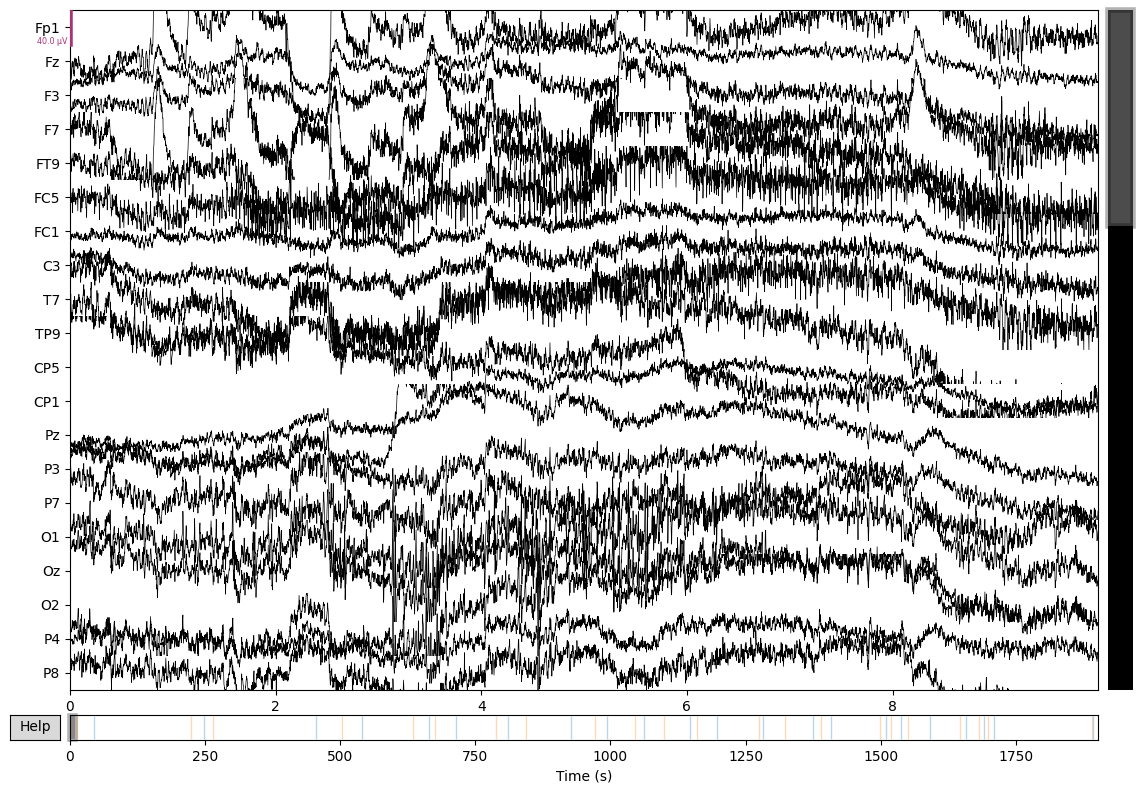

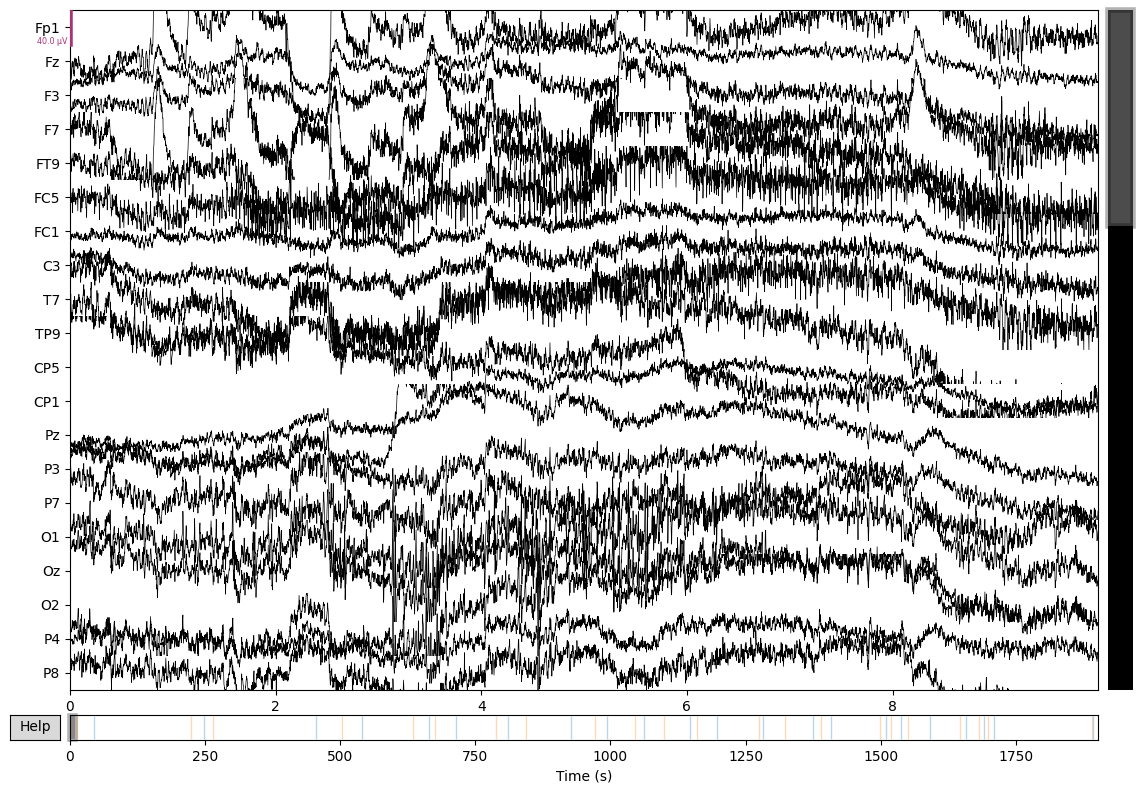

In [10]:
# filename.vhdr   → header (metadata)
# filename.eeg    → EEG signal (binary samples)
# filename.vmrk   → event markers (timestamps)

mne_data_path = os.path.abspath("../../data/eeg_openendedloosely/raw18")
vhdr_path = os.path.join(mne_data_path, "april_18(2).vhdr")

raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
print(raw)
print(raw.info)
raw.plot()

In [11]:
data, times = raw.get_data(return_times=True)

print("--- DATA ---")
print(len(data))
print(data)

print("--- TIMES ---")
print(len(times))
print(times)

--- DATA ---
63
[[-0.02963931 -0.02964269 -0.0296429  ... -0.02956828 -0.02957842
  -0.02958212]
 [-0.01931059 -0.01930936 -0.01930822 ... -0.01812921 -0.01812706
  -0.01812743]
 [-0.01143105 -0.01143361 -0.01143566 ... -0.01292169 -0.01292163
  -0.01292515]
 ...
 [-0.00372917 -0.00372499 -0.0037295  ... -0.00492808 -0.00492157
  -0.00491832]
 [-0.0098358  -0.00983568 -0.00983866 ... -0.018592   -0.01858919
  -0.01857223]
 [-0.0293572  -0.02936762 -0.02936259 ... -0.03246002 -0.03250966
  -0.0324567 ]]
--- TIMES ---
951015
[0.000000e+00 2.000000e-03 4.000000e-03 ... 1.902024e+03 1.902026e+03
 1.902028e+03]
